In [1]:
import os
import json
import nltk
from nltk.corpus import stopwords
from collections import Counter
import pandas as pd

# tokens_freq contains total frequency for each token
# file_texts contains for each file a dictionary where the keys are the tokens present in the file and the values are the frequence
TokenDict = dict[str, float]
FileDict = dict[str, dict[str, int]]

dir = './raw/'
sub_files = [f for f in os.listdir(dir) if f.endswith('.vtt')]
inv_lines = ["\n", "[Música]\n", "WEBVTT\n", "Kind: captions\n", "Language: es-419\n"]
inv_chars = ['\n', ',', '.', '"', '-', '?', '!', '¿', '¡']

def clean_word(word):
    for c in inv_chars:
        word = word.replace(c,'')
    return word

nltk.download('stopwords')
stop_words = stopwords.words('spanish')

file_texts = {}
tokens_freq = {}

for filename in sub_files:
    if filename.endswith(".vtt"):
        with open(dir + filename, 'r', encoding='utf-8') as file:
            words = (' '.join([line for line in file if (line and line not in inv_lines and "-->" not in line)])).split(' ')
            words = [clean_word(word).lower() for word in words if (word not in stop_words and word not in inv_chars)]
            for word in words:
                tokens_freq[word] = tokens_freq.get(word,0) + 1
            file_texts[filename] = Counter(words)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pedrodalbianco/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


count    11502.000000
mean         5.240480
std         16.984613
min          1.000000
25%          1.000000
50%          1.000000
75%          4.000000
max        506.000000
dtype: float64

Mean:  5.240479916536255
Std:  16.984612871339117


<AxesSubplot:>

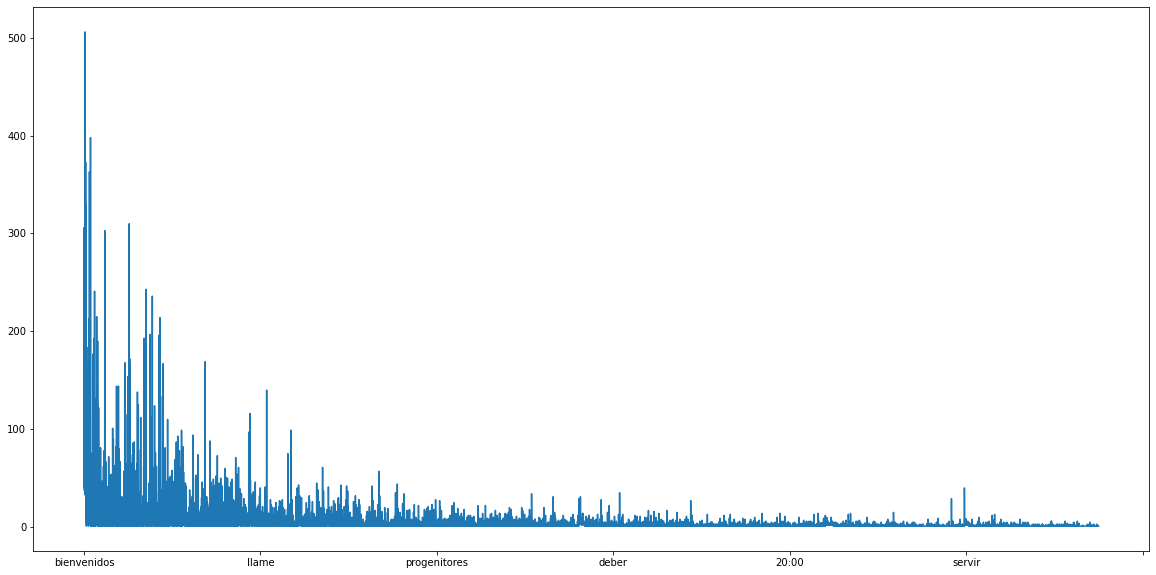

In [3]:
s_tokens_freq = pd.Series(tokens_freq)
display(s_tokens_freq.describe())
print('Mean: ', s_tokens_freq.mean())
print('Std: ', s_tokens_freq.std())
display(s_tokens_freq.plot(figsize=(20,10)))

In [4]:
from functools import reduce

with open("data/subs_dict.json", 'r', encoding='utf-8') as subs_dict_file:
  subs_dict = json.load(subs_dict_file)

total_secs = sum(map(lambda fl: reduce(lambda r, s: r + (s[1] - s[0]), fl, 0), subs_dict.values()))

print("Total hours: ", total_secs/3600)

Total hours:  16.05609777777778
